In [1]:
import numpy as np
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
import matplotlib.pyplot as plt
from tensorflow.keras.layers import BatchNormalization
from keras_preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Dataset

this dataset was used from [kaggle](https://www.kaggle.com/datasets/vasukipatel/face-recognition-dataset) with some
modification


Dataset structure

```
+-- face-recognition-dataset
|   +-- Faces
|   +-- Original Images
|   +-- Dataset.csv(labes for images)
+-- test(images taken from internet)
```
Also I used ImageDataGenerator from tensorflow to ease the process of feeding data to CNN

In [2]:
train_dir="face-recognition-dataset/Original Images/Original Images/"
generator = ImageDataGenerator()
train_ds = generator.flow_from_directory(train_dir,target_size=(224, 224),batch_size=32)
classes = list(train_ds.class_indices.keys())

Found 2562 images belonging to 31 classes.


### CNN architecture 

In [3]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.3))
model.add(Dense(len(classes),activation='softmax'))

In [4]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 111, 111, 32)      128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 54, 54, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 64)        3

In [5]:
#trained on Nvidia RTX 3070 laptop GPU
history = model.fit(train_ds,epochs= 30, batch_size=32,steps_per_epoch = 81)

Epoch 1/30
81/81 [==============================] - 49s 551ms/step - loss: 3.4975 - accuracy: 0.0867
Epoch 2/30
81/81 [==============================] - 46s 570ms/step - loss: 2.7112 - accuracy: 0.2287
Epoch 3/30
81/81 [==============================] - 47s 574ms/step - loss: 2.2892 - accuracy: 0.3240
Epoch 4/30
81/81 [==============================] - 46s 567ms/step - loss: 1.8529 - accuracy: 0.4500
Epoch 5/30
81/81 [==============================] - 46s 564ms/step - loss: 1.5813 - accuracy: 0.5238
Epoch 6/30
81/81 [==============================] - 46s 562ms/step - loss: 1.3103 - accuracy: 0.6019
Epoch 7/30
81/81 [==============================] - 46s 565ms/step - loss: 1.0332 - accuracy: 0.6784
Epoch 8/30
81/81 [==============================] - 45s 551ms/step - loss: 0.7741 - accuracy: 0.7763
Epoch 9/30
81/81 [==============================] - 45s 553ms/step - loss: 0.6064 - accuracy: 0.8345
Epoch 10/30
81/81 [==============================] - 45s 551ms/step - loss: 0.4238 - accura

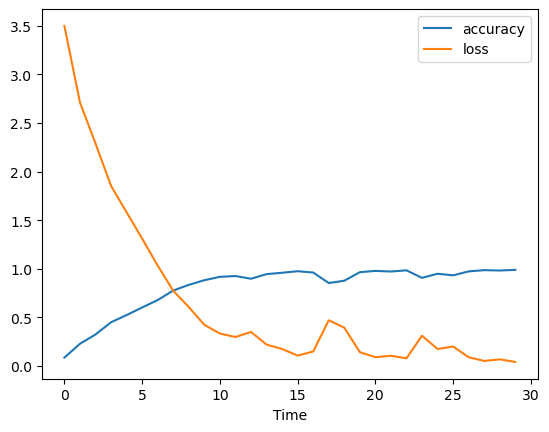

In [6]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.xlabel('Time')
plt.legend(['accuracy', 'loss'])
plt.show()

In [30]:
### some prediction from this model

In [7]:
def predict_image(image_path):
    img = image.load_img(image_path, target_size=(224,224,3))
    plt.imshow(img)
    plt.show()
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    pred = model.predict(images, batch_size=32)
    print("Actual: "+(image_path.split("/")[-1]).split("_")[0])
    print("Predicted: "+classes[np.argmax(pred)])

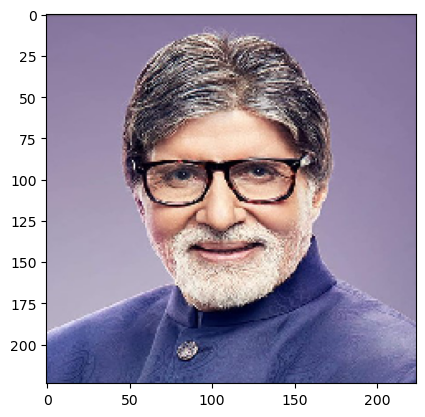

Actual: amittest3.jpg
Predicted: Amitabh Bachchan


In [25]:
predict_image("test/amittest3.jpg")

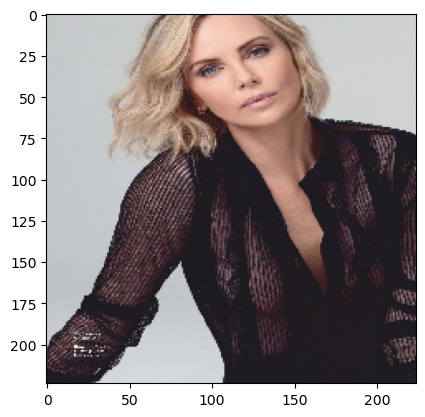

Actual: Charlize Theron
Predicted: Charlize Theron


In [9]:
predict_image("face-recognition-dataset/Original Images/Original Images/Charlize Theron/Charlize Theron_26.jpg")

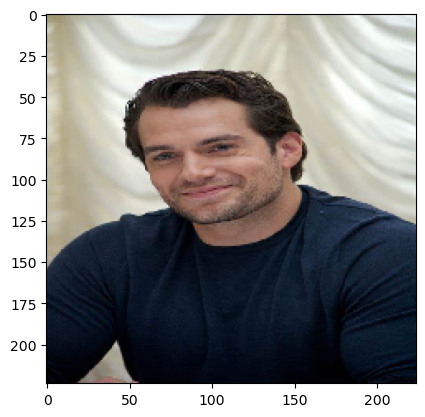

Actual: Henry Cavill
Predicted: Henry Cavill


In [10]:
predict_image("face-recognition-dataset/Original Images/Original Images/Henry Cavill/Henry Cavill_28.jpg")

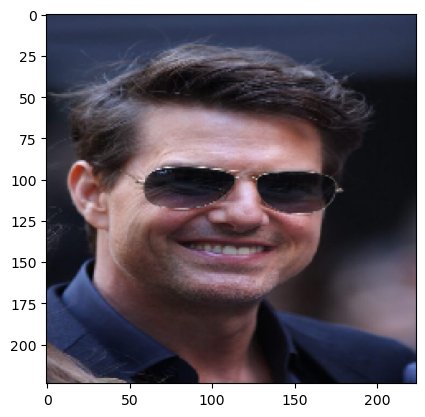

Actual: Tom Cruise
Predicted: Tom Cruise


In [11]:
predict_image("face-recognition-dataset/Original Images/Original Images/Tom Cruise/Tom Cruise_27.jpg")

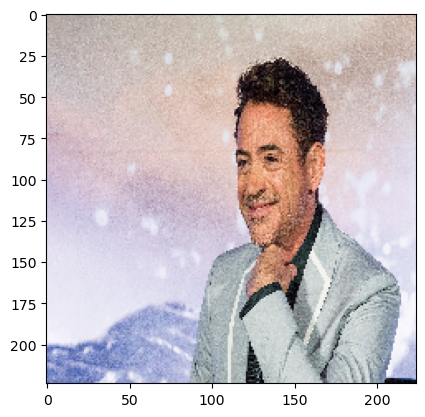

Actual: Robert Downey Jr
Predicted: Robert Downey Jr


In [12]:
predict_image("face-recognition-dataset/Original Images/Original Images/Robert Downey Jr/Robert Downey Jr_106.jpg")

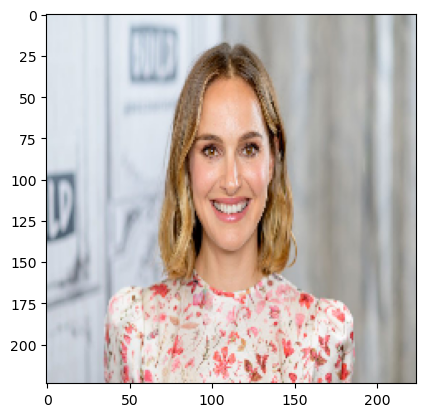

Actual: Natalie Portman
Predicted: Natalie Portman


In [13]:
predict_image("face-recognition-dataset/Original Images/Original Images/Natalie Portman/Natalie Portman_25.jpg")

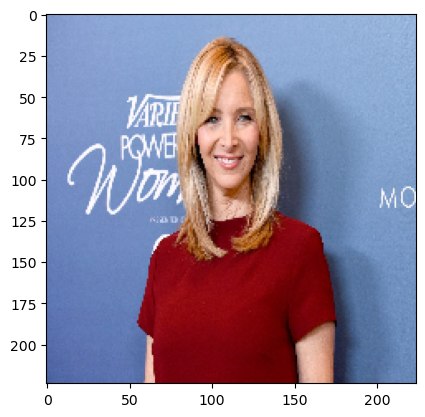

Actual: Lisa Kudrow
Predicted: Lisa Kudrow


In [14]:
predict_image("face-recognition-dataset/Original Images/Original Images/Lisa Kudrow/Lisa Kudrow_34.jpg")

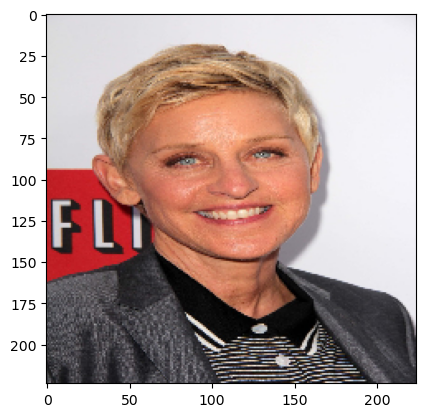

Actual: Ellen Degeneres
Predicted: Ellen Degeneres


In [15]:
predict_image("face-recognition-dataset/Original Images/Original Images/Ellen Degeneres/Ellen Degeneres_20.jpg")

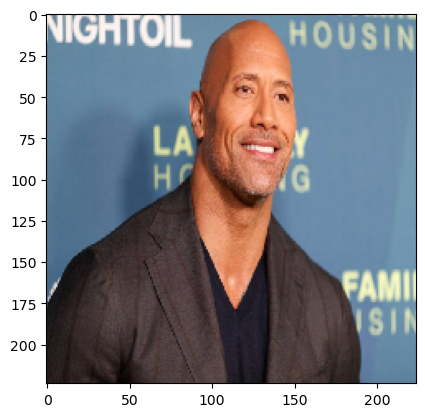

Actual: Dwayne Johnson
Predicted: Dwayne Johnson


In [16]:
predict_image("face-recognition-dataset/Original Images/Original Images/Dwayne Johnson/Dwayne Johnson_29.jpg")

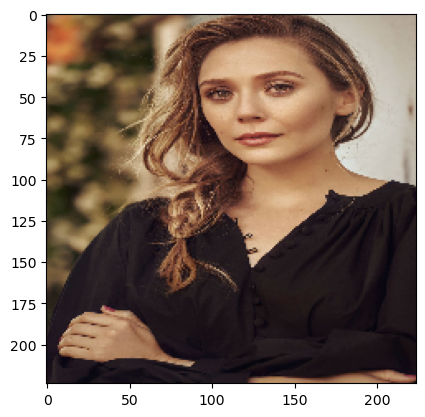

Actual: Elizabeth Olsen
Predicted: Elizabeth Olsen


In [17]:
predict_image("face-recognition-dataset/Original Images/Original Images/Elizabeth Olsen/Elizabeth Olsen_11.jpg")

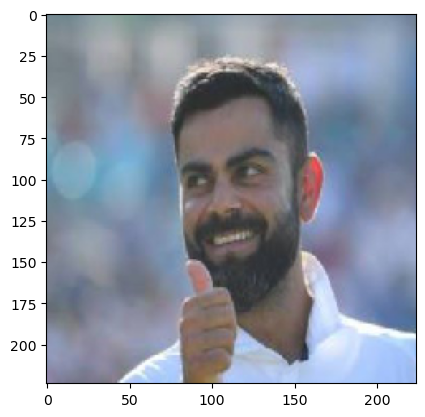

Actual: kohli
Predicted: Virat Kohli


In [28]:
predict_image("test/kohli_.jpg")